<a href="https://colab.research.google.com/github/Aadityapritam/Google_collab_practice/blob/master/Image_classiication_cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from tensorflow import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout,Activation
import matplotlib.pyplot as plt

In [0]:
(train_img, train_labels),(test_img, test_labels)= cifar10.load_data()

In [0]:
train_img=train_img/255.0
test_img=test_img/255.0

In [97]:
print("Train image shape:",train_img.shape)
print("Test image shape:",test_img.shape)
print("Each image shape in Train_img:",train_img[0].shape)
print("Train Labels",train_labels.shape)
print("Test Labels", test_labels.shape)

Train image shape: (50000, 32, 32, 3)
Test image shape: (10000, 32, 32, 3)
Each image shape in Train_img: (32, 32, 3)
Train Labels (50000, 1)
Test Labels (10000, 1)


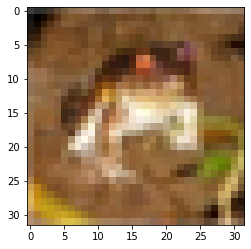

In [98]:
img=plt.imshow(train_img[0], cmap=plt.cm.binary)
img

In [0]:
no_class=10
classess=['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

rows,cols=32,32
channels=3

In [0]:
from keras.utils import to_categorical
train_labels=to_categorical(train_labels, no_class)
test_labels=to_categorical(test_labels, no_class)

In [101]:
import numpy as np

print(test_labels.shape)
print(train_labels.shape)

(10000, 10)
(50000, 10)


In [0]:
model1=Sequential()
model1.add(Conv2D(128,(3,3),padding='same',activation='relu', input_shape=(rows,cols,channels)))
model1.add(MaxPooling2D(2,2))
model1.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model1.add(MaxPooling2D(2,2))
model1.add(Conv2D(64,(2,2),padding='same',activation='relu'))
model1.add(MaxPooling2D(2,2))
model1.add(Flatten())
model1.add(Dense(64,activation='relu'))
model1.add(Dense(10, activation='softmax'))

In [135]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 128)       3584      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        73792     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 64)          16448     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)             

In [0]:
model1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'],)

In [137]:
res1 = model1.fit(train_img, train_labels, epochs=10, validation_data=(test_img, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 9s 183us/step - loss: 1.4800 - accuracy: 0.4611 - val_loss: 1.2022 - val_accuracy: 0.5762
Epoch 2/10
50000/50000 [==============================] - 9s 174us/step - loss: 1.0876 - accuracy: 0.6156 - val_loss: 1.0762 - val_accuracy: 0.6189
Epoch 3/10
50000/50000 [==============================] - 9s 175us/step - loss: 0.9324 - accuracy: 0.6735 - val_loss: 0.9446 - val_accuracy: 0.6712
Epoch 4/10
50000/50000 [==============================] - 9s 174us/step - loss: 0.8402 - accuracy: 0.7047 - val_loss: 0.8832 - val_accuracy: 0.6904
Epoch 5/10
50000/50000 [==============================] - 9s 177us/step - loss: 0.7669 - accuracy: 0.7323 - val_loss: 0.8429 - val_accuracy: 0.7141
Epoch 6/10
50000/50000 [==============================] - 9s 178us/step - loss: 0.7085 - accuracy: 0.7531 - val_loss: 0.8291 - val_accuracy: 0.7155
Epoch 7/10
50000/50000 [==============================] - 9s 1

In [123]:
pip install -U keras-tuner

Requirement already up-to-date: keras-tuner in /usr/local/lib/python3.6/dist-packages (1.0.1)


In [0]:
from tensorflow import keras
from tensorflow.keras import layers


def create_model(hp):
  model2=Sequential([
      Conv2D(filters=hp.Int('conv_1_filter',min_value=32, max_value=256, step=20), kernel_size=hp.Choice('conv_1_kernel',values=[2,5]), activation='relu', input_shape=(rows,cols,channels)),
      MaxPooling2D(filter=hp.Int('mxpool_1', kernel_size=hp.Choice('mxpool_1_kernel',values=[2,5]))),
      Conv2D(filters=hp.Int('conv_2', min_value=32, max_value=128, step=20), kernel_size=hp.Choice('conv_2_filter',values=[2,5]),activation='relu'),
      MaxPooling2D(filter=hp.Int('mxpool_2', kernel_size=hp.Choice('mxpool_2_kernel',values=[2,5]))),
      Flatten(),
      Dense(units=hp.Int('dense_1', min_value=32, max_value=128,step=20),activation='relu'),
      Dense(no_class,activation='softmax')
      ])

  model2.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate',values=[1e-2, 1e-3, 1e-4])),
      loss='sparse_categorical_crossentropy',
      metrics=['accuracy'])
  
  return model2
 

In [140]:
from kerastuner.engine.hyperparameters import HyperParameters
from kerastuner.tuners import RandomSearch

tunner=RandomSearch(create_model, objective='val_accuracy', max_trials=5, directory='collab_Deep_Learning',project_name='Image_classifiaion_cifar10')

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/kerastuner/engine/hypermodel.py", line 105, in build
    model = self.hypermodel.build(hp)
  File "<ipython-input-129-f8600efbcac5>", line 8, in create_model
    MaxPooling2D(filter=hp.Int('mxpool_1', kernel_size=hp.Choice('mxpool_1_kernel',values=[2,5]))),
TypeError: Int() got an unexpected keyword argument 'kernel_size'


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/kerastuner/engine/hypermodel.py", line 105, in build
    model = self.hypermodel.build(hp)
  File "<ipython-input-129-f8600efbcac5>", line 8, in create_model
    MaxPooling2D(filter=hp.Int('mxpool_1', kernel_size=hp.Choice('mxpool_1_kernel',values=[2,5]))),
TypeError: Int() got an unexpected keyword argument 'kernel_size'


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/kerastuner/engine/hypermodel.py", line 105, in build
    model = self.hypermodel.build(hp)
  File "<ipython-input-129-f8600efbcac5>", line 8, in create_model
    MaxPooling2D(filter=hp.Int('mxpool_1', kernel_size=hp.Choice('mxpool_1_kernel',values=[2,5]))),
TypeError: Int() got an unexpected keyword argument 'kernel_size'


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/kerastuner/engine/hypermodel.py", line 105, in build
    model = self.hypermodel.build(hp)
  File "<ipython-input-129-f8600efbcac5>", line 8, in create_model
    MaxPooling2D(filter=hp.Int('mxpool_1', kernel_size=hp.Choice('mxpool_1_kernel',values=[2,5]))),
TypeError: Int() got an unexpected keyword argument 'kernel_size'


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/kerastuner/engine/hypermodel.py", line 105, in build
    model = self.hypermodel.build(hp)
  File "<ipython-input-129-f8600efbcac5>", line 8, in create_model
    MaxPooling2D(filter=hp.Int('mxpool_1', kernel_size=hp.Choice('mxpool_1_kernel',values=[2,5]))),
TypeError: Int() got an unexpected keyword argument 'kernel_size'


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/kerastuner/engine/hypermodel.py", line 105, in build
    model = self.hypermodel.build(hp)
  File "<ipython-input-129-f8600efbcac5>", line 8, in create_model
    MaxPooling2D(filter=hp.Int('mxpool_1', kernel_size=hp.Choice('mxpool_1_kernel',values=[2,5]))),
TypeError: Int() got an unexpected keyword argument 'kernel_size'


RuntimeError: ignored

In [92]:
res2 = model2.fit(train_img, train_labels, epochs=20, validation_data=(test_img, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 9s 178us/step - loss: 0.1788 - accuracy: 0.9357 - val_loss: 1.5364 - val_accuracy: 0.7244
Epoch 2/20
50000/50000 [==============================] - 9s 175us/step - loss: 0.1655 - accuracy: 0.9403 - val_loss: 1.6461 - val_accuracy: 0.7216
Epoch 3/20
50000/50000 [==============================] - 9s 185us/step - loss: 0.1679 - accuracy: 0.9402 - val_loss: 1.6469 - val_accuracy: 0.7198
Epoch 4/20
50000/50000 [==============================] - 9s 182us/step - loss: 0.1577 - accuracy: 0.9427 - val_loss: 1.6958 - val_accuracy: 0.7269
Epoch 5/20
50000/50000 [==============================] - 9s 175us/step - loss: 0.1589 - accuracy: 0.9432 - val_loss: 1.6993 - val_accuracy: 0.7168
Epoch 6/20
50000/50000 [==============================] - 9s 175us/step - loss: 0.1515 - accuracy: 0.9450 - val_loss: 1.7115 - val_accuracy: 0.7220
Epoch 7/20
50000/50000 [==============================] - 9s 1

In [0]:
k